In [1]:
#Import all libs 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

! pip install folium
import folium
#set the path file

import os
notebook_path = os.path.abspath("AnalysisNetflix.ipynb")

#import every tables

urlNetflix=os.path.join(os.path.dirname("AnalysisNetflix.ipynb"), "Kaggle_Dataset/Netflix/netflix_titles.csv")
urlIMD_movies=os.path.join(os.path.dirname("AnalysisNetflix.ipynb"), "Kaggle_Dataset/IMD/IMDb movies.csv")
urlIMD_names=os.path.join(os.path.dirname("AnalysisNetflix.ipynb"), "Kaggle_Dataset/IMD/IMDb names.csv")
urlIMD_ratings=os.path.join(os.path.dirname("AnalysisNetflix.ipynb"), "Kaggle_Dataset/IMD/IMDb ratings.csv")
urlIMD_title_principals=os.path.join(os.path.dirname("AnalysisNetflix.ipynb"), "Kaggle_Dataset/IMD/IMDb title_principals.csv")

In [2]:
#Read tables using pandas

dfNetflix=pd.read_csv(urlNetflix)
dfIMD_movies=pd.read_csv(urlIMD_movies)
dfIMD_names=pd.read_csv(urlIMD_names)
dfIMD_ratings=pd.read_csv(urlIMD_ratings)
dfIMD_title_principals=pd.read_csv(urlIMD_title_principals)

C:\Users\Valentin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Show tables

print('Netflix table')
dfNetflix.head()

Netflix table


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
print('IMD_movies table')
dfIMD_movies.head()

IMD_movies table


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
print('IMD_names table')
dfIMD_names.head()

IMD_names table


,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [6]:
print('IMD_ratings table')
dfIMD_ratings.head()

IMD_ratings table


,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [7]:
#Firts of all we will analyze the Netflix Table alone
#Show ID doesn"t appear in other tables so we can drop it

dfNetflix.drop(['show_id'], axis=1)




,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [8]:
#Let's put the title as index
dfNetflix.set_index('title')

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,,
Norm of the North: King Sized Adventure,81145628,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
Jandino: Whatever it Takes,80117401,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
Transformers Prime,70234439,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
Transformers: Robots in Disguise,80058654,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
#realityhigh,80125979,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,80000063,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
Maron,70286564,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
Little Baby Bum: Nursery Rhyme Friends,80116008,Movie,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


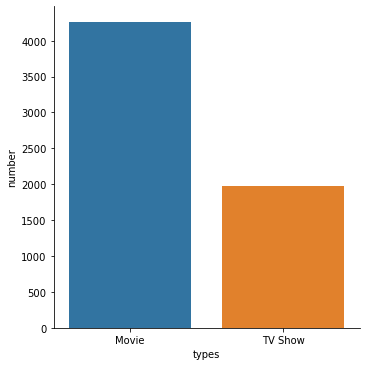

In [9]:
# How many numbers of TV show and Movie is there on Netflix ?

Movie_show=dfNetflix['type'].value_counts().rename_axis('types').reset_index(name='number')
sns.catplot(x="types", y="number", kind='bar', data=Movie_show)

In [10]:
print(Movie_show)

     types  number
0    Movie    4265
1  TV Show    1969


In [11]:
#Now let's ask ourself how did these numbers evolved ? We will group the Netflix dataframe by date_added, First let's check if our dates are in a valid format
dfNetflix.date_added.dtype

dtype('O')

In [12]:
#In order to group by date then sort the results, we need a date time format

dfNetflix['date_added']=pd.to_datetime(dfNetflix['date_added'])

In [13]:
#We do not want missing values in our analysis

print(dfNetflix.isna().sum())

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [14]:
#We are interested in the date_added and the type, so we need these values to be free of NA. We cannot add the mean
#With only 11 date missing we can drop the rows, but we want to keep the original database intact, thus we create another DF

dfNetflix_type_year=dfNetflix[['type','date_added']]
dfNetflix_type_year= dfNetflix_type_year.dropna(axis=0)

In [15]:
# The objective is to count the total number of film and movies added by Netflix through the years. 
#To do so we will one hot encode Movie and TV Show, and creat a df including the cumulative sum through the years

dummies=pd.get_dummies(dfNetflix_type_year, columns=['type'], prefix='', prefix_sep='')

#The one hot encoded values are not int so we transform them

dummies.Movie=dummies.Movie.astype(int)
dummies['TV Show']=dummies['TV Show'].astype(int)

In [16]:
#Finally we create a to_sum dataframe including our summed values

to_sum=dummies.groupby(by='date_added').sum().cumsum()
print(to_sum)

            Movie  TV Show
date_added                
2008-01-01      1        0
2008-02-04      1        1
2009-05-05      2        1
2009-11-18      3        1
2010-11-01      4        1
...           ...      ...
2020-01-14   4248     1951
2020-01-15   4255     1953
2020-01-16   4262     1956
2020-01-17   4263     1959
2020-01-18   4264     1959

[1189 rows x 2 columns]


[Text(0, 0.5, 'Cumulative number')]

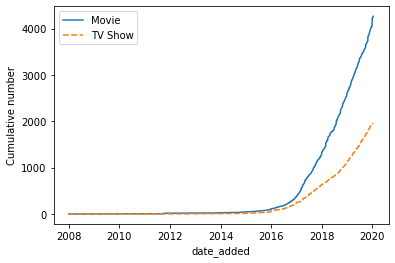

In [17]:
sns.lineplot( data=to_sum).set(ylabel='Cumulative number')

(14610.0, 16801.0)

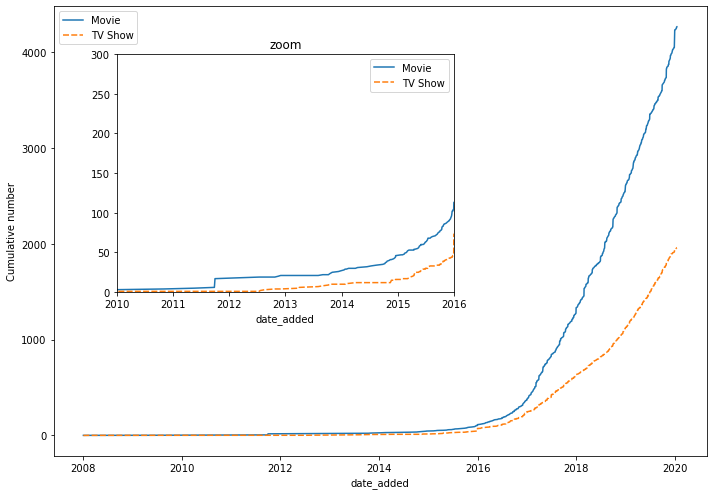

In [18]:
#Let's resize this plot and try to add a zoom on the 2010/2014 area

Bigger_plot = (11.7, 8.27)
fig, ax = plt.subplots(figsize=Bigger_plot)
sns.lineplot( ax=ax,data=to_sum).set(ylabel='Cumulative number')

ax2 = plt.axes([0.2, 0.4, 0.4, 0.4], facecolor='White')
sns.lineplot(data=to_sum, ax=ax2)
ax2.set_title('zoom')
ax2.set_ylim([0,300])
ax2.set_xlim([datetime.strptime('01 1 2010', '%m %d %Y'),datetime.strptime('01 1 2016', '%m %d %Y')])

In [19]:
# We have a clear view on the Evolution of netflix catalog.
#Now we change of subject, and would like to know what is the average duration of tv_show per year

#The first thing to do a creat a dataframe containing only  TV Shows:

tv_show=dfNetflix['type']=='TV Show'
dfNetflix[tv_show]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018-09-07,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [20]:
df_tv_show=dfNetflix[tv_show]
#problem is that the duration is not in mins but in season. So we want to transform this string values in int

In [21]:
#We create a dictionnary to remove the string from the duration
rep_dic={}
for i in range (0,len(df_tv_show.duration.unique())):
    rep_dic[df_tv_show.duration.unique()[i]]=re.sub("[^0-9]", " ",df_tv_show.duration.unique()[i])
print (rep_dic)

{'1 Season': '1       ', '2 Seasons': '2        ', '5 Seasons': '5        ', '3 Seasons': '3        ', '7 Seasons': '7        ', '4 Seasons': '4        ', '8 Seasons': '8        ', '6 Seasons': '6        ', '9 Seasons': '9        ', '14 Seasons': '14        ', '10 Seasons': '10        ', '12 Seasons': '12        ', '15 Seasons': '15        ', '11 Seasons': '11        ', '13 Seasons': '13        '}


In [22]:
#duration is now an int
int_duration=df_tv_show.duration.replace(rep_dic).astype(int)

In [23]:
df_tv_show.duration=int_duration

C:\Users\Valentin\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df_tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018-09-07,2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [25]:
df_mean_year=df_tv_show[['release_year','duration']]

In [26]:
df_mean_year.release_year.value_counts()
#The data sample size is way too low before 2003, and it is not a good sample to take, but together, they still
# represents a good amount of data, we will merge them so we have a before 2003 row
#to do so we will do the mean of season from 2003 to 1925, then drop every show older than 2003 and inserting a new row

isbefore2003=df_mean_year.release_year<2003
df_mean_year[isbefore2003].duration.mean()

2.6153846153846154

In [27]:
before_2003=pd.Series(index=['duration','release_year'],data=[df_mean_year[isbefore2003].duration.mean(),2000])

#we have created an index with year 2000 (before 2000) and with the avg number of seasons
#Now we want to drop every columns before 2003

In [28]:
sorted_value=df_mean_year.drop(index=df_mean_year[isbefore2003].index)
sorted_value

,release_year,duration
2,2013,1
3,2016,1
5,2016,1
8,2017,1
26,2015,1
...,...,...
6228,2010,2
6229,2015,13
6230,2016,4
6232,2013,2


In [29]:
sorted_value = pd.concat([sorted_value, before_2003.to_frame().T])
sorted_value.release_year=sorted_value.release_year.astype(int)
sorted_value=sorted_value.groupby(by='release_year').mean()

[Text(0, 0, '2000'),
 Text(1, 0, '2003'),
 Text(2, 0, '2004'),
 Text(3, 0, '2005'),
 Text(4, 0, '2006'),
 Text(5, 0, '2007'),
 Text(6, 0, '2008'),
 Text(7, 0, '2009'),
 Text(8, 0, '2010'),
 Text(9, 0, '2011'),
 Text(10, 0, '2012'),
 Text(11, 0, '2013'),
 Text(12, 0, '2014'),
 Text(13, 0, '2015'),
 Text(14, 0, '2016'),
 Text(15, 0, '2017'),
 Text(16, 0, '2018'),
 Text(17, 0, '2019'),
 Text(18, 0, '2020')]

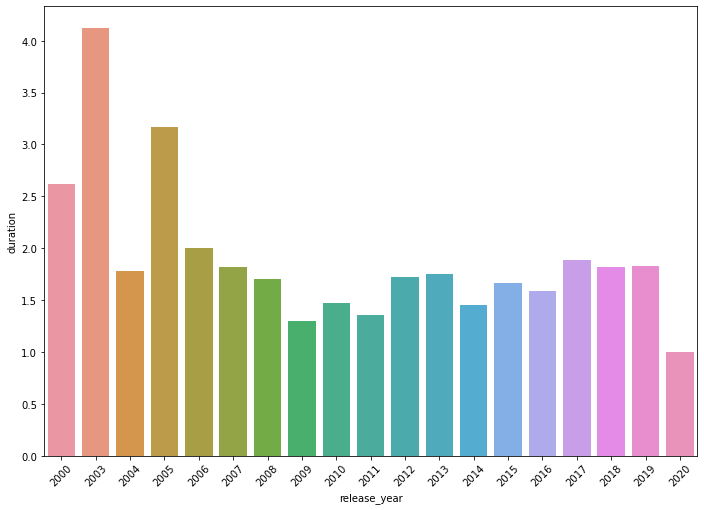

In [30]:
#Now we can represent the number of season in average per year with a plot chart

fig, ax = plt.subplots(figsize=Bigger_plot)
plot=sns.barplot(ax=ax,data=sorted_value,x=sorted_value.index, y="duration")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


In [31]:
#we can see that there are no real trend over the years
len(dfNetflix.listed_in.unique())

461

<AxesSubplot:title={'center':'Number of content per category on Netflix'}, ylabel='Categories'>

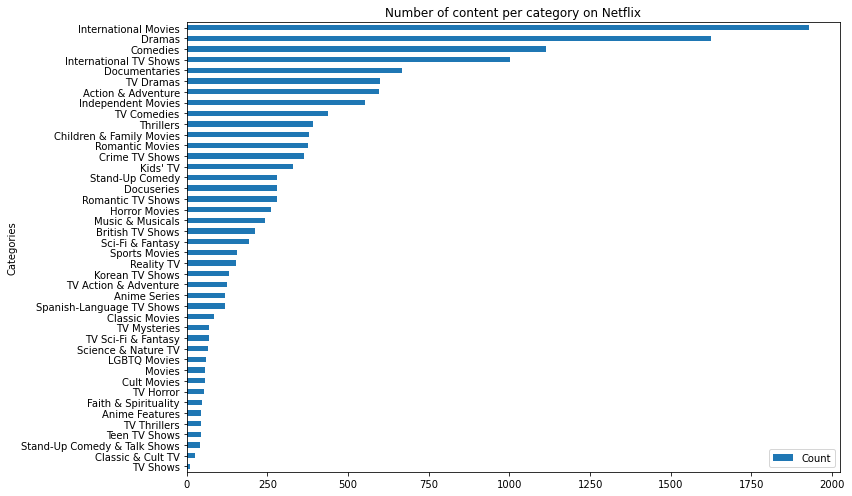

In [36]:
#one hot encode the listed in value, and using ',' as a separator within each column
df_Dummies = dfNetflix['listed_in'].str.get_dummies(', ')
#count the number of films including each topic
df_sorted_type=df_Dummies.sum()
#Creating the frame
df_sorted_type=df_sorted_type.to_frame(name='Count').sort_values(by='Count')
#plotting the 
fig, ax = plt.subplots(figsize=Bigger_plot)
df_sorted_type.plot(ax=ax,kind='barh', xlabel='Categories', title='Number of content per category on Netflix')

In [33]:
df_sorted_type.Count.sum()

13670

In [50]:
#We do the same for the actors appearance but we restrict the results to the top 20 


df_dum = dfNetflix['cast'].str.get_dummies(', ')
df_sorted_actor=df_dum.sum()
df_sorted_actor=df_sorted_actor.to_frame(name='Appearance').sort_values(by='Appearance')
df_sorted_actor=df_sorted_actor.tail(20)


<AxesSubplot:title={'center':'Number of content per the top 20 actors appearance'}, ylabel='Actor'>

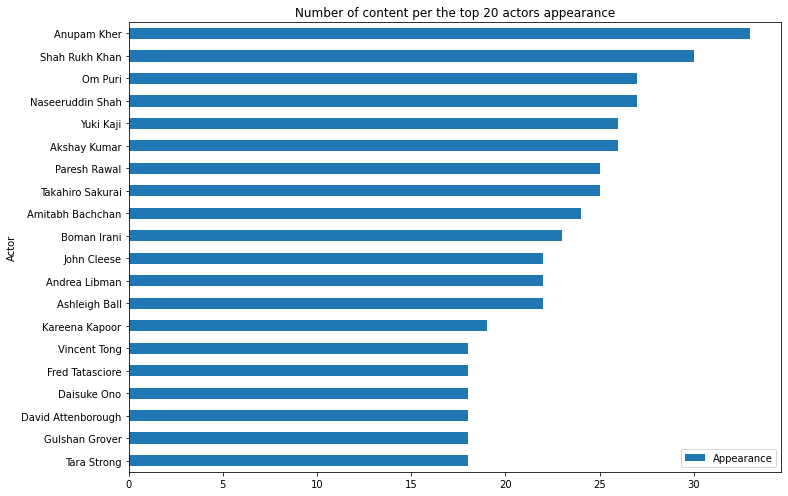

In [51]:
fig, ax = plt.subplots(figsize=Bigger_plot)
df_sorted_actor.plot(ax=ax,kind='barh', xlabel='Actor', title='Number of content per the top 20 actors appearance')

In [49]:
# A quick search show that the top listed actors are indian actors.

,Appearance
Anupam Kher,33
Shah Rukh Khan,30
Naseeruddin Shah,27
Om Puri,27
Akshay Kumar,26
Yuki Kaji,26
Paresh Rawal,25
Takahiro Sakurai,25
Amitabh Bachchan,24
Boman Irani,23


In [60]:
index_name=dfIMD_names.set_index('name')

In [70]:
index_name.loc[index_name.index.str.contains('Daisuke')]

,imdb_name_id,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
name,,,,,,,,,,,,,,,,
Daisuke Asakura,nm0038326,Daisuke Asakura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
Daisuke Gotô,nm0331840,Daisuke Gotô,NaN,Daisuke Gotô is a writer and director.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
Daisuke Gôri,nm0351338,Yoshio Nagahori,NaN,"Daisuke Gôri was born on February 8, 1952 in K...","February 8, 1952 in Koto, Japan",1952-02-08,"Koto, Japan","January 17, 2010 in Honchô, Nakano, Tokyo, Jap...",2010-01-17,"Honchô, Nakano, Tokyo, Japan",suicide,NaN,0,0,0,0
Daisuke Hayashi,nm0370612,Daisuke Hayashi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
Daisuke Hinata,nm0385455,Daisuke Hinata,NaN,"Daisuke Hinata is an international, multi-tale...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
Daisuke Honda,nm0393090,Daisuke Honda,178.0,"Daisuke Honda was born on August 29, 1978 in T...","August 29, 1978 in Tokyo, Japan",1978-08-29,"Tokyo, Japan",NaN,NaN,NaN,NaN,NaN,0,0,0,0
Daisuke Iijima,nm0407348,Daisuke Iijima,NaN,"Daisuke Iijima is an actor, known for Furyo (1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
Daisuke Inoue,nm0409272,Takao Inoue,NaN,"Daisuke Inoue was born on September 13, 1941 a...","September 13, 1941",1941-09-13,NaN,"May 30, 2000 (suicide)",2000-05-30,NaN,suicide,NaN,0,0,0,0
Daisuke Itô,nm0411866,Daisuke Itô,NaN,"Daisuke Itô was born on October 13, 1898 in To...","October 13, 1898 in Tokyo, Japan",1898-10-13,"Tokyo, Japan","July 19, 1981 in Japan (undisclosed)",1981-07-19,Japan,undisclosed,NaN,0,0,0,0
